# Felipe Hideki - RM983232
# Enzo Vasconcelos - RM550702
# Guilherme Milheiro - RM550295

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error

In [79]:
dataset = pd.read_csv('breast-cancer-dataset.csv')
print(dataset.head())
dataset = dataset[dataset['Breast Quadrant']!='#']
dataset = dataset[dataset['History']!='#']
dataset = dataset[dataset['History']!='#']

   S/N  Year  Age  Menopause Tumor Size (cm) Inv-Nodes Breast Metastasis  \
0    1  2019   40          1               2         0  Right          0   
1    2  2019   39          1               2         0   Left          0   
2    3  2019   45          0               4         0   Left          0   
3    4  2019   26          1               3         0   Left          0   
4    5  2019   21          1               1         0  Right          0   

  Breast Quadrant History Diagnosis Result  
0     Upper inner       0           Benign  
1     Upper outer       0           Benign  
2     Lower outer       0           Benign  
3     Lower inner       1           Benign  
4     Upper outer       1           Benign  


In [ ]:
#Como os quadrantes se relacionam com o lado da mama?

pd.crosstab(dataset['Breast Quadrant'],dataset['Diagnosis Result'])

Diagnosis Result,Benign,Malignant
Breast Quadrant,,
Lower inner,35,9
Lower outer,35,18
Upper inner,24,21
Upper outer,24,43
Upper outer,1,0


A tabela mostra o número de casos Benignos e Malignos em cada quadrante da mama.

Upper outer tem o maior número de casos malignos, o que sugere que este quadrante pode ter uma maior chance a desenvolver tumores malignos em comparação com os outros quadrantes.
Upper inner também apresenta um número significativo de casos malignos, mas muito menos do que o superior externo. 
Em todos os quadrantes, é possível observar que a maioria dos casos são benignos.

In [81]:
#Qual a média geral de nodulos por paciente?

dataset['Inv-Nodes'] = dataset['Inv-Nodes'].astype(int)
dataset['Inv-Nodes'].mean()

0.3523809523809524

Essa média mostra que não apresenta nódulos metastáticos, já que a média é inferior a 1. Isso pode indicar que muitos pacientes têm um diagnóstico inicial sem metástase nos linfonodos.
Um número baixo de nódulos pode ser um sinal positivo, indicando que os casos de câncer detectados são, em geral, menos avançados ou que as metástases não são comuns na amostra analisada.

In [82]:
#Qual a média geral do tamanho do tumor por paciente?

dataset['Tumor Size (cm)'] = dataset['Tumor Size (cm)'].astype(int)
dataset['Tumor Size (cm)'].mean()



4.261904761904762

Esse tamanho é bem grande para um tumor, tumores com esse tamanho podem estar em estágios mais avançados, dependendo da classificação e do tipo de câncer.
Em geral, tumores maiores podem estar associados a um prognóstico menos favorável. Tumores de maior dimensão podem indicar um crescimento mais agressivo e, muitas vezes, uma maior probabilidade de metástase.

In [84]:
#Existem mais pessoas com tumores do lado direito ou esquerdo?

dataset['Breast'].value_counts()



Breast
Left     105
Right    100
#          5
Name: count, dtype: int64

Isso pode sugerir uma leve tendência ou predisposição para o desenvolvimento de tumores no lado esquerdo na população analisada.

In [85]:
#Qual a média de idade para pessoas que entraram na menopausa?

base_menopausa = dataset[(dataset['Menopause']==1)]
base_menopausa['Age'].mean()



32.67142857142857

Uma média de 32 anos para a menopausa é considerada bastante precoce, já que a idade média de início da menopausa para a maioria das mulheres geralmente ocorre entre 45 e 55 anos. 
A menopausa precoce pode estar associada a várias condições de saúde, como fatores genéticos, problemas hormonais, ou condições de saúde subjacentes.

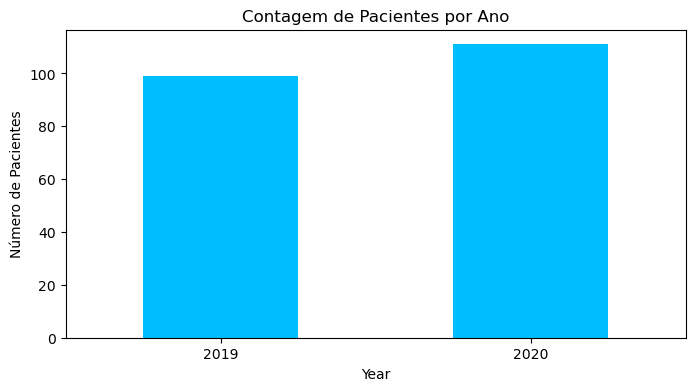

In [86]:
#Qual o ano em que mais pessoas tiveram tumor? 
contagem_ano = dataset.groupby('Year')['Age'].count()

# Gráfico
plt.figure(figsize=(8, 4))
contagem_ano.plot(kind='bar', color='deepskyblue')
plt.ylabel('Número de Pacientes')
plt.title('Contagem de Pacientes por Ano')
plt.xticks(rotation=0)
plt.show()

In [89]:
#Como os quadrantes se relacionam com o lado da mama? Use a tabela de contingência.

pd.crosstab(dataset['Breast Quadrant'],dataset['Breast'])

Breast,#,Left,Right
Breast Quadrant,,,
Lower inner,1,23,20
Lower outer,1,28,24
Upper inner,1,21,23
Upper outer,2,33,32
Upper outer,0,0,1


Upper outer parece ser uma área bem comum para o desenvolvimento de tumores.
Em geral, a distribuição entre os lados parece bastante equilibrada em todos os quadrantes. No entanto, o quadrante superior externo é o mais frequente, o que pode indicar uma predisposição ou fatores de risco associados a esse quadrante.
A relação entre a localização do tumor e o lado da mama pode ser importante para determinar o risco e a necessidade de triagem adicional. Tumores em quadrantes específicos podem ter diferentes implicações para o tratamento.

<BarContainer object of 5 artists>

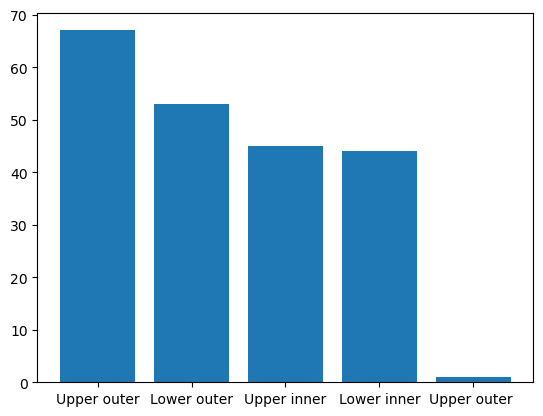

In [ ]:
#Como os quadrantes estão distribuídos?

plt.bar(dataset['Breast Quadrant'].value_counts().index, dataset['Breast Quadrant'].value_counts().values)

In [76]:
# Preparação dos dados
dataset['Breast'] = LabelEncoder().fit_transform(dataset['Breast'])
dataset['Breast Quadrant'] = LabelEncoder().fit_transform(dataset['Breast Quadrant'])
dataset['Diagnosis Result'] = LabelEncoder().fit_transform(dataset['Diagnosis Result'])

# Separação dos dados
X_class = dataset.drop(columns=['Diagnosis Result'])
y_class = dataset['Diagnosis Result']
X_reg = dataset.drop(columns=['Tumor Size (cm)'])
y_reg = dataset['Tumor Size (cm)']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [21]:
# Classificação
clf = RandomForestClassifier()
clf.fit(X_train_class, y_train_class)
y_pred_class = clf.predict(X_test_class)
print(f'Precisão: {accuracy_score(y_test_class, y_pred_class)}')

Precisão: 0.9047619047619048


In [22]:
reg = RandomForestRegressor()
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)
print(f'MSE (erro quadrático médio): {mean_squared_error(y_test_reg, y_pred_reg)}')

MSE (erro quadrático médio): 2.6279309523809524


Em resumo, a análise dos dados fornece uma visão abrangente das características dos tumores de mama em sua população de estudo. Esses insights podem ajudar a melhorar a triagem, diagnóstico e tratamento, além de fomentar discussões sobre saúde pública e políticas de prevenção.